In [50]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from typing import Any, Dict, Sequence, List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import hp, pyll

In [12]:
plt.style.use("ggplot")

## Helper Functions

In [45]:
def trial_to_df(trial: Sequence[Dict[str, Any]]) -> pd.DataFrame:
    """ "
    Convert a Trial object (sequence of trial dictionaries)

    Args:
        trial: List[Dict[str, Any]]
        A list of trial dictionaries.

    Returns:
         pd.DataFrame
        A DataFrame with the following columns:
            - loss: The loss value for the trial
            - trial_id: The trial id
            - values: The values for each dictionary.
    """
    vals: List = []
    for t in trial:
        result = t["result"]
        misc = t["misc"]
        val = {k: (v[0] if isinstance(v, list) else v) for k, v in misc["vals"].items()}
        val["loss"] = result["loss"]
        val["tid"] = t["tid"]
        vals.append(val)
    return pd.DataFrame(vals)

In [13]:
pyll.stochastic.sample(hp.choice("value", ["a", "b", "c"]))

'b'

In [14]:
pyll.stochastic.sample(hp.pchoice("value", [(0.05, "a"), (0.9, "b"), (0.05, "c")]))

'b'

In [16]:
pyll.stochastic.sample(hp.uniform("value", 0, 1))

0.998215638851317

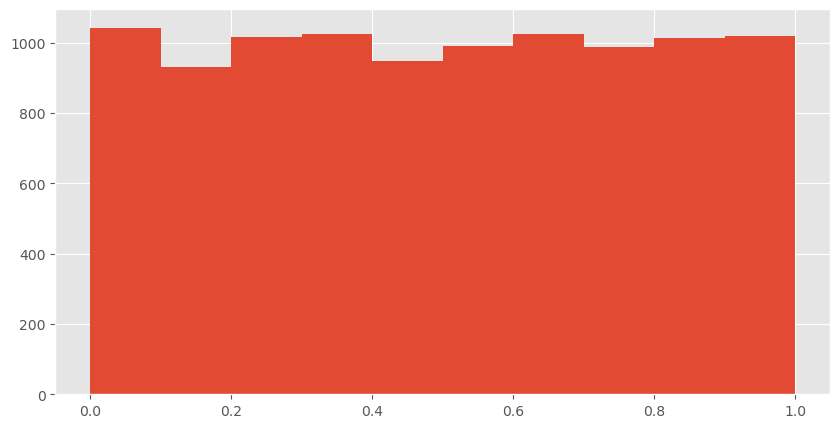

In [26]:
uniform_vals = [
    pyll.stochastic.sample(hp.uniform("value", 0, 1)) for _ in range(10_000)
]
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(uniform_vals)
plt.show()

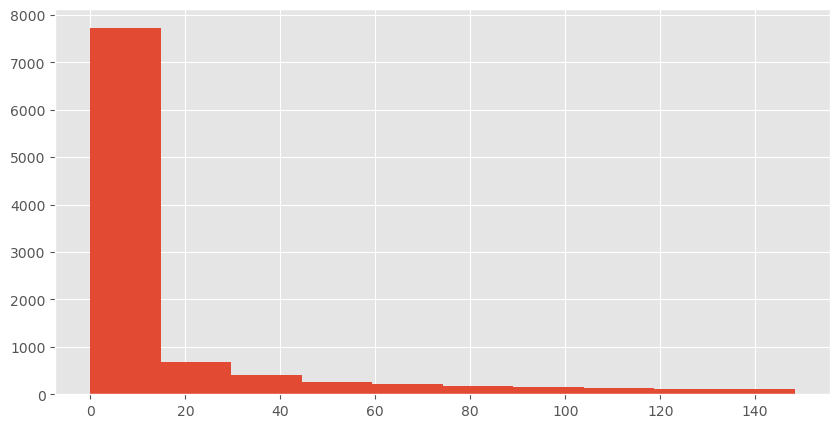

In [28]:
loguniform_vals = [
    pyll.stochastic.sample(hp.loguniform("value", -5, 5)) for _ in range(10_000)
]
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(loguniform_vals)
plt.show()

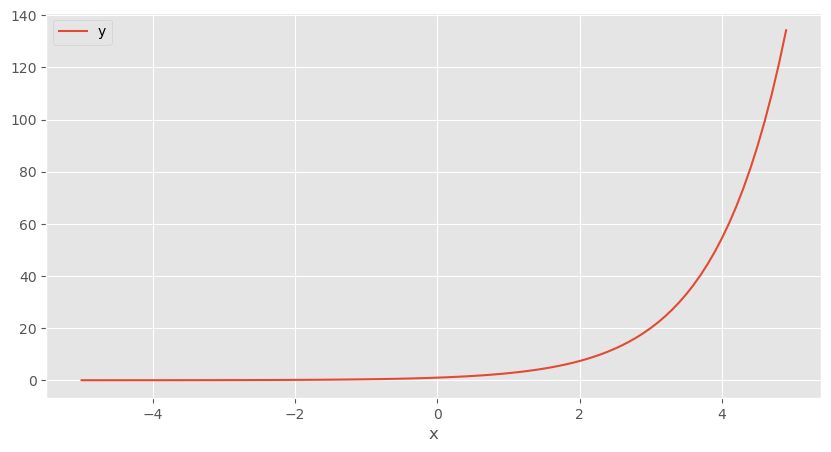

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
(
    pd.Series(np.arange(-5, 5, step=0.1))
    .rename("x")
    .to_frame()
    .assign(y=lambda adf: np.exp(adf.x))
    .plot(x="x", y="y", ax=ax)
)
plt.show()